## Quick check any physics parameters for a single file

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib, shlex, subprocess
import xbout
import scipy
import xhermes
from xhermes import *


sys.path.append(r"/users/jpm590/2dspace/post-processing/sdtools/")


from hermes3.utils import *


from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.selectors import *

%load_ext autoreload
%autoreload 2
print("Done")


Done


In [3]:
db = CaseDB(
    case_dir = r"/users/jpm590/scratch/",
    # grid_dir = r"/users/jpm590/2dspace/hermes-3/build-mc-master"
    grid_dir = r"/users/jpm590/neutralrun/hermes-3/master"

)

toload = [
    dict(name="new_grid_old_param", id="251205-cdn-46895-old-param", unnormalise_geom = True, use_xhermes = True, squash = True),

    dict(name="new_grid", id="251210-cdn-46895", unnormalise_geom = True, use_xhermes = True, squash = True),
    dict(name="original", id="251007-2D-MASTU", unnormalise_geom = True, use_xhermes = True, squash = True)

]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)
    cs[case["name"]].extract_2d_tokamak_geometry()

- Reading case 251205-cdn-46895-old-param
-----------------------
- Looking for squash file
- Squash file found. squash date 12/10/2025, 17:50:34, dmp file date 12/10/2025, 03:32:19


/users/jpm590/workspace/hermes-3/venv/lib/python3.12/site-packages/xbout/load.py:1124: UserWarning: Will drop all variables containing the dimensions 'closed_wall' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case 251210-cdn-46895
-----------------------
- Looking for squash file
- Squash file found. squash date 12/12/2025, 11:48:51, dmp file date 12/11/2025, 15:23:27


/users/jpm590/workspace/hermes-3/venv/lib/python3.12/site-packages/xbout/load.py:1124: UserWarning: Will drop all variables containing the dimensions 'closed_wall' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case 251007-2D-MASTU
-----------------------
- Looking for squash file
- Squash file found. squash date 10/17/2025, 15:41:40, dmp file date 10/16/2025, 00:59:55

Unnormalising with xHermes


In [34]:
### Check meta data
m = cs["original"].ds.metadata
m
ds = cs["original"].ds
ds



<xarray.Dataset> Size: 20GB
Dimensions:                  (x: 40, theta: 108, t: 5685)
Coordinates: (12/24)
    dx                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dy                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dz                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    zShift                   (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
  * t                        (t) float64 45kB 0.0 9.999e-06 ... 0.1053 0.1054
    psi_poloidal             (x, theta) float64 35kB -0.001427 ... 0.00634
    ...                       ...
    Zxy_upper_left_corners   (x, theta) float64 35kB -1.287 -1.279 ... -1.725
    Zxy_upper_right_corners  (x, theta) float64 35kB -1.286 -1.277 ... -1.698
  * x                        (x) int64 320B 0 1 2 3 4 5 6 ... 34 35 36 37 38 39
  * theta                    (theta) float64 864B 0.07854 0.2356 ... 16.73 16.89
    zeta                     float64 8B 3.142
    theta_idx                (theta) int64 864B 0 1 2 3 4 ... 104 105 106 107
Data variables: (12/157)
    Bxy                      (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Dnnd                     (t, x, theta) float64 196MB dask.array<chunksize=(1, 40, 108), meta=np.ndarray>
    Ed+_VgradP               (t, x, theta) float64 196MB dask.array<chunksize=(1, 40, 108), meta=np.ndarray>
    Ed+_iz                   (t, x, theta) float64 196MB dask.array<chunksize=(1, 40, 108), meta=np.ndarray>
    Ed+_rec                  (t, x, theta) float64 196MB dask.array<chunksize=(1, 40, 108), meta=np.ndarray>
    Ed+e_coll                (t, x, theta) float64 196MB dask.array<chunksize=(1, 40, 108), meta=np.ndarray>
    ...                       ...
    dv                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dr                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    hthe                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dl                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dtor                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dpol                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
Attributes:
    squashoutput_version:  0.2.1
    metadata:              {'BOUT_VERSION': 5.12, 'Bnorm': 1.0, 'Cs0': 97871....
    options:               nout = 20000000            # number of writes\ntim...
    regions:               {'lower_inner_PFR': <xbout.region.Region>\n\tname\...
    geometry:              toroidal
    components:            {'d+': {'type': 'evolve_density, evolve_momentum, ...

### Calculate the total power source
By `Pd+_src` + `Pe_src` times dv

Energy = 3/2 * pressure * volume 

`P_src` are in per second. So it's Power = 3/2 * P_src * dv

In [37]:
######
ds = cs["original"].ds.isel(t=-1)
total_press = ds["Pd+_src"].values + ds["Pe_src"].values + ds["Pd_src"].values
print(total_press)
power = 3/2 * (ds["Pd+_src"].values + ds["Pe_src"].values + ds["Pd_src"].values) * ds["dv"].values
power = np.sum(power)
print(f"Total power source = {power}")






[[      0.             0.             0.       ...       0.
        0.             0.      ]
 [      0.             0.             0.       ...       0.
        0.             0.      ]
 [2255172.802616 2255172.802616       0.       ...       0.
  2255172.802616 2255172.802616]
 ...
 [      0.             0.             0.       ...       0.
        0.             0.      ]
 [      0.             0.             0.       ...       0.
        0.             0.      ]
 [      0.             0.             0.       ...       0.
        0.             0.      ]]
Total power source = 610442.265519238


In [42]:

######
ds = cs["new_grid_old_param"].ds.isel(t=-1)
total_press = ds["Pd+_src"].values + ds["Pe_src"].values + ds["Pd_src"].values
print(total_press.sum())
power2 = 3/2 * (ds["Pd+_src"].values + ds["Pe_src"].values + ds["Pd_src"].values) * ds["dv"].values
power2 = np.sum(power2)
print(f"Total power source = {power2}")





198455206.63020802
Total power source = 1004973.1363427014


In [41]:

######
ds = cs["new_grid"].ds.isel(t=-1)
total_press = ds["Pd+_src"].values + ds["Pe_src"].values + ds["Pd_src"].values
print(total_press.sum())
power3 = 3/2 * (ds["Pd+_src"].values + ds["Pe_src"].values + ds["Pd_src"].values) * ds["dv"].values
power3 = np.sum(power3)
print(f"Total power source = {power3}")



900657638.8209134
Total power source = 4371634.553703005


In [ ]:
#######

ds = cs["original"].ds.isel(t=-1)

nparticles = (ds["Sd_src"].values) * ds["dv"].values
nparticles = np.sum(nparticles)
print(f"Total number of particles = {nparticles}")


####### 
## 這個檔案是最原始的gridfile所以本來就沒有放Nd_src, Sd_src當然是空的
ds = cs["new_grid_old_param"].ds.isel(t=-1)
nparticles = (ds["Sd_src"].values) * ds["dv"].values
nparticles = np.sum(nparticles)
print(f"Total number of particles = {nparticles}")


####### 
## 這個是有用tune_puff調整過的
ds = cs["new_grid"].ds.isel(t=-1)
nparticles = (ds["Sd_src"].values) * ds["dv"].values
nparticles = np.sum(nparticles)
print(f"Total number of particles = {nparticles}")

Total number of particles = 5e+21
Total number of particles = 0.0
Total number of particles = 1.3e+22


## Calculate volume

Get the volume of the region you want.

You could possibly choose ([reference](https://github.com/mikekryjak/sdtools/blob/4242b6f0a55edf66d0b6e6f706bb7dc8515eb143/hermes3/deprecated/stuff.py#L155)): 
```python 
    core = ds.hermesm.select_region("core_edge")
    sol = ds.hermesm.select_region("sol_edge")
    pfr = ds.hermesm.select_region("pfr_edge")
    domain = ds.hermesm.select_region("all_noguards")
    domain_volume = domain["dv"].values.sum()
```
When you change a grid, the core volume is changed as well, therefore check "core_edge"

In [10]:
ds = cs["original"].ds.isel(t=-1)

domain = ds.hermesm.select_region("core_edge")
domain_volume = domain["dv"].values.sum()
print(domain_volume)

#####
ds = cs["new_grid_old_param"].ds.isel(t=-1)

domain = ds.hermesm.select_region("core_edge")
domain_volume = domain["dv"].values.sum()
print(domain_volume)

0.17736872858937297
0.2968858850770253


### Find the first core ring
The fuel is fuelling in the first core ring, so you should find the correct normalised position for fuelling function in input file.

```python
source = H(x) * H({first core ring} - x) * pressure_source
```

Below `sep` shows the position of the separatrix. `Srad` is the real distance from the separatrix (-: core, +: Sol). Note that `Srad` is in the cell center, while the real separatrix is on the boundary.


Parameter Nd_src not found


t  total_poloidal_distance      zeta        dr        dx  Pd_src  \
0   0.105351                 4.424466  3.141593  0.003199  0.000835     0.0   
1   0.105351                 4.493357  3.141593  0.002882  0.000752     0.0   
2   0.105351                 4.558650  3.141593  0.002584  0.000673     0.0   
3   0.105351                 4.620321  3.141593  0.002303  0.000599     0.0   
4   0.105351                 4.678362  3.141593  0.002041  0.000530     0.0   
5   0.105351                 4.732785  3.141593  0.001796  0.000467     0.0   
6   0.105351                 4.783626  3.141593  0.001571  0.000408     0.0   
7   0.105351                 4.830948  3.141593  0.001363  0.000353     0.0   
8   0.105351                 4.874847  3.141593  0.001174  0.000304     0.0   
9   0.105351                 4.915454  3.141593  0.001004  0.000260     0.0   
10  0.105351                 4.952949  3.141593  0.000852  0.000221     0.0   
11  0.105351                 4.987576  3.141593  0.000720  0.000186     0.0   
12  0.105351                 5.019668  3.141593  0.000606  0.000157     0.0   
13  0.105351                 5.049696  3.141593  0.000511  0.000132     0.0   
14  0.105351                 5.078363  3.141593  0.000435  0.000112     0.0   
15  0.105351                 5.106810  3.141593  0.000378  0.000098     0.0   
16  0.105351                 5.137221  3.141593  0.000340  0.000088     0.0   
17  0.105351                 5.175895  3.141593  0.000321  0.000083     0.0   
18  0.105351                      NaN  3.141593  0.000320  0.000083     0.0   
19  0.105351                      NaN  3.141593  0.000334  0.000086     0.0   
20  0.105351                      NaN  3.141593  0.000363  0.000094     0.0   
21  0.105351                      NaN  3.141593  0.000406  0.000105     0.0   
22  0.105351                      NaN  3.141593  0.000463  0.000120     0.0   
23  0.105351                      NaN  3.141593  0.000535  0.000138     0.0   
24  0.105351                      NaN  3.141593  0.000621  0.000160     0.0   
25  0.105351                      NaN  3.141593  0.000722  0.000186     0.0   
26  0.105351                      NaN  3.141593  0.000837  0.000215     0.0   
27  0.105351                      NaN  3.141593  0.000966  0.000249     0.0   
28  0.105351                      NaN  3.141593  0.001111  0.000286     0.0   
29  0.105351                      NaN  3.141593  0.001269  0.000326     0.0   
30  0.105351                      NaN  3.141593  0.001443  0.000370     0.0   
31  0.105351                      NaN  3.141593  0.001632  0.000418     0.0   
32  0.105351                      NaN  3.141593  0.001835  0.000470     0.0   
33  0.105351                      NaN  3.141593  0.002054  0.000525     0.0   
34  0.105351                      NaN  3.141593  0.002288  0.000584     0.0   
35  0.105351                      NaN  3.141593  0.002537  0.000647     0.0   

          Pe_src       Pd+_src  Sd_src      Srad  sep  
0   1.127586e+06  1.127586e+06     0.0 -0.022480    0  
1   0.000000e+00  0.000000e+00     0.0 -0.019439    0  
2   0.000000e+00  0.000000e+00     0.0 -0.016706    0  
3   0.000000e+00  0.000000e+00     0.0 -0.014262    0  
4   0.000000e+00  0.000000e+00     0.0 -0.012090    0  
5   0.000000e+00  0.000000e+00     0.0 -0.010172    0  
6   0.000000e+00  0.000000e+00     0.0 -0.008488    0  
7   0.000000e+00  0.000000e+00     0.0 -0.007022    0  
8   0.000000e+00  0.000000e+00     0.0 -0.005753    0  
9   0.000000e+00  0.000000e+00     0.0 -0.004664    0  
10  0.000000e+00  0.000000e+00     0.0 -0.003736    0  
11  0.000000e+00  0.000000e+00     0.0 -0.002950    0  
12  0.000000e+00  0.000000e+00     0.0 -0.002287    0  
13  0.000000e+00  0.000000e+00     0.0 -0.001728    0  
14  0.000000e+00  0.000000e+00     0.0 -0.001256    0  
15  0.000000e+00  0.000000e+00     0.0 -0.000849    0  
16  0.000000e+00  0.000000e+00     0.0 -0.000490    0  
17  0.000000e+00  0.000000e+00     0.0 -0.000160    0  
18  0.000000e+00  0.000

------------------------
Parameter Nd_src not found


t  total_poloidal_distance      zeta        dr        dx  Pd_src  \
0   0.00174                 3.831418  3.141593  0.007483  0.002440     0.0   
1   0.00174                 3.943389  3.141593  0.006791  0.002215     0.0   
2   0.00174                 4.049806  3.141593  0.006145  0.002003     0.0   
3   0.00174                 4.150752  3.141593  0.005542  0.001805     0.0   
4   0.00174                 4.246313  3.141593  0.004980  0.001619     0.0   
5   0.00174                 4.336584  3.141593  0.004459  0.001447     0.0   
6   0.00174                 4.421685  3.141593  0.003977  0.001288     0.0   
7   0.00174                 4.501782  3.141593  0.003534  0.001143     0.0   
8   0.00174                 4.577099  3.141593  0.003131  0.001010     0.0   
9   0.00174                 4.647935  3.141593  0.002767  0.000891     0.0   
10  0.00174                 4.714687  3.141593  0.002442  0.000785     0.0   
11  0.00174                 4.777892  3.141593  0.002157  0.000693     0.0   
12  0.00174                 4.838276  3.141593  0.001913  0.000613     0.0   
13  0.00174                 4.896849  3.141593  0.001709  0.000547     0.0   
14  0.00174                 4.955097  3.141593  0.001545  0.000494     0.0   
15  0.00174                 5.015426  3.141593  0.001423  0.000454     0.0   
16  0.00174                 5.082561  3.141593  0.001342  0.000428     0.0   
17  0.00174                 5.171179  3.141593  0.001302  0.000415     0.0   
18  0.00174                      NaN  3.141593  0.001300  0.000413     0.0   
19  0.00174                      NaN  3.141593  0.001322  0.000420     0.0   
20  0.00174                      NaN  3.141593  0.001366  0.000433     0.0   
21  0.00174                      NaN  3.141593  0.001430  0.000453     0.0   
22  0.00174                      NaN  3.141593  0.001517  0.000480     0.0   
23  0.00174                      NaN  3.141593  0.001624  0.000513     0.0   
24  0.00174                      NaN  3.141593  0.001753  0.000553     0.0   
25  0.00174                      NaN  3.141593  0.001904  0.000599     0.0   
26  0.00174                      NaN  3.141593  0.002078  0.000652     0.0   
27  0.00174                      NaN  3.141593  0.002273  0.000712     0.0   
28  0.00174                      NaN  3.141593  0.002492  0.000779     0.0   
29  0.00174                      NaN  3.141593  0.002733  0.000852     0.0   
30  0.00174                      NaN  3.141593  0.002998  0.000931     0.0   
31  0.00174                      NaN  3.141593  0.003287  0.001018     0.0   
32  0.00174                      NaN  3.141593  0.003601  0.001111     0.0   
33  0.00174                      NaN  3.141593  0.003941  0.001210     0.0   
34  0.00174                      NaN  3.141593  0.004307  0.001316     0.0   
35  0.00174                      NaN  3.141593  0.004701  0.001429     0.0   

          Pe_src       Pd+_src  Sd_src      Srad  sep  
0   1.127586e+06  1.127586e+06     0.0 -0.058898    0  
1   0.000000e+00  0.000000e+00     0.0 -0.051761    0  
2   0.000000e+00  0.000000e+00     0.0 -0.045293    0  
3   0.000000e+00  0.000000e+00     0.0 -0.039449    0  
4   0.000000e+00  0.000000e+00     0.0 -0.034188    0  
5   0.000000e+00  0.000000e+00     0.0 -0.029469    0  
6   0.000000e+00  0.000000e+00     0.0 -0.025251    0  
7   0.000000e+00  0.000000e+00     0.0 -0.021496    0  
8   0.000000e+00  0.000000e+00     0.0 -0.018164    0  
9   0.000000e+00  0.000000e+00     0.0 -0.015215    0  
10  0.000000e+00  0.000000e+00     0.0 -0.012611    0  
11  0.000000e+00  0.000000e+00     0.0 -0.010311    0  
12  0.000000e+00  0.000000e+00     0.0 -0.008276    0  
13  0.000000e+00  0.000000e+00     0.0 -0.006465    0  
14  0.000000e+00  0.000000e+00     0.0 -0.004838    0  
15  0.000000e+00  0.000000e+00     0.0 -0.003354    0  
16  0.000000e+00  0.000000e+00     0.0 -0.001972    0  
17  0.000000e+00  0.000000e+00     0.0 -0.000650    0  
18  0.000000e+00  0.000000e+00     0.0  0.000650    1  
19 

------------------------
Parameter Nd_src not found


t  total_poloidal_distance      zeta        dr        dx  \
0   0.00011                 3.831418  3.141593  0.007483  0.002440   
1   0.00011                 3.943389  3.141593  0.006791  0.002215   
2   0.00011                 4.049806  3.141593  0.006145  0.002003   
3   0.00011                 4.150752  3.141593  0.005542  0.001805   
4   0.00011                 4.246313  3.141593  0.004980  0.001619   
5   0.00011                 4.336584  3.141593  0.004459  0.001447   
6   0.00011                 4.421685  3.141593  0.003977  0.001288   
7   0.00011                 4.501782  3.141593  0.003534  0.001143   
8   0.00011                 4.577099  3.141593  0.003131  0.001010   
9   0.00011                 4.647935  3.141593  0.002767  0.000891   
10  0.00011                 4.714687  3.141593  0.002442  0.000785   
11  0.00011                 4.777892  3.141593  0.002157  0.000693   
12  0.00011                 4.838276  3.141593  0.001913  0.000613   
13  0.00011                 4.896849  3.141593  0.001709  0.000547   
14  0.00011                 4.955097  3.141593  0.001545  0.000494   
15  0.00011                 5.015426  3.141593  0.001423  0.000454   
16  0.00011                 5.082561  3.141593  0.001342  0.000428   
17  0.00011                 5.171179  3.141593  0.001302  0.000415   
18  0.00011                      NaN  3.141593  0.001300  0.000413   
19  0.00011                      NaN  3.141593  0.001322  0.000420   
20  0.00011                      NaN  3.141593  0.001366  0.000433   
21  0.00011                      NaN  3.141593  0.001430  0.000453   
22  0.00011                      NaN  3.141593  0.001517  0.000480   
23  0.00011                      NaN  3.141593  0.001624  0.000513   
24  0.00011                      NaN  3.141593  0.001753  0.000553   
25  0.00011                      NaN  3.141593  0.001904  0.000599   
26  0.00011                      NaN  3.141593  0.002078  0.000652   
27  0.00011                      NaN  3.141593  0.002273  0.000712   
28  0.00011                      NaN  3.141593  0.002492  0.000779   
29  0.00011                      NaN  3.141593  0.002733  0.000852   
30  0.00011                      NaN  3.141593  0.002998  0.000931   
31  0.00011                      NaN  3.141593  0.003287  0.001018   
32  0.00011                      NaN  3.141593  0.003601  0.001111   
33  0.00011                      NaN  3.141593  0.003941  0.001210   
34  0.00011                      NaN  3.141593  0.004307  0.001316   
35  0.00011                      NaN  3.141593  0.004701  0.001429   

          Pd_src        Pe_src       Pd+_src        Sd_src      Srad  sep  
0   0.000000e+00  1.122750e+06  1.122750e+06  0.000000e+00 -0.058898    0  
1   0.000000e+00  1.122750e+06  1.122750e+06  0.000000e+00 -0.051761    0  
2   0.000000e+00  1.122750e+06  1.122750e+06  0.000000e+00 -0.045293    0  
3   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.039449    0  
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.034188    0  
5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.029469    0  
6   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.025251    0  
7   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.021496    0  
8   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.018164    0  
9   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.015215    0  
10  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.012611    0  
11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.010311    0  
12  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.008276    0  
13  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.006465    0  
14  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.004838    0  
15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.003354    0  
16  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.001972    0  
17  0.000000e+00  0.000000e+00  0.000000e+00  0.000

------------------------


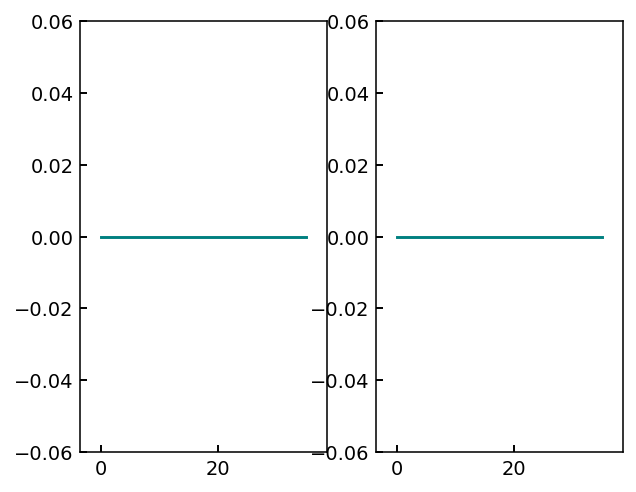

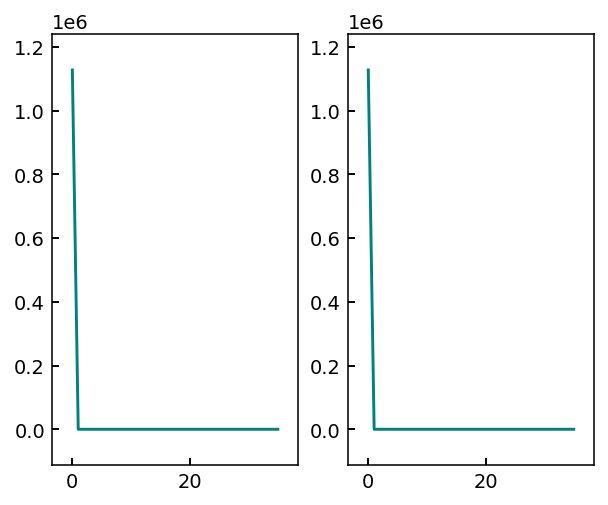

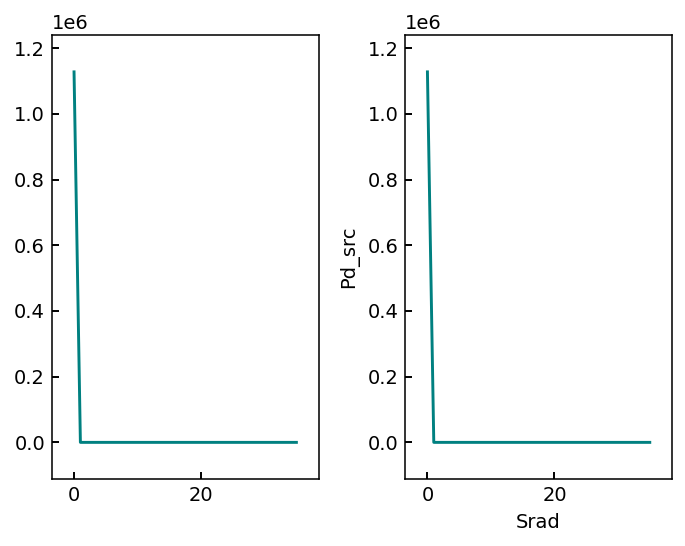

In [36]:
ds1 = cs["original"].ds.isel(t=-1)

df1 = get_1d_radial_data(ds1, params = ["dx", "Pd_src","Pe_src","Pd+_src", "Sd_src", "Nd_src"], region = "omp")
display(df1)
print("------------------------")

######
ds2 = cs["new_grid_old_param"].ds.isel(t=-1)
df2 = get_1d_radial_data(ds2, params = ["dx", "Pd_src","Pe_src","Pd+_src", "Sd_src", "Nd_src"], region = "omp")
display(df2)
print("------------------------")

######
ds3 = cs["new_grid"].ds.isel(t=-1)
df3 = get_1d_radial_data(ds3, params = ["dx", "Pd_src","Pe_src","Pd+_src", "Sd_src", "Nd_src"], region = "omp")
display(df3)
print("------------------------")



##### PLOT source

fig, ax = plt.subplots(1,2)
df1["Pd_src"].plot(ax= ax[0])
df2["Pd_src"].plot(ax=ax[1])

fig2, ax2 = plt.subplots(1,2)
df1["Pd+_src"].plot(ax= ax2[0])
df2["Pd+_src"].plot(ax= ax2[1])

fig3, ax3 = plt.subplots(1,2)
df1["Pe_src"].plot(ax =ax3[0])
df2["Pe_src"].plot(ax =ax3[1])


plt.xlabel("Srad")
plt.ylabel("Pd_src")
plt.tight_layout()




To get the normalised core ring position `x`, take `x` by cumulatively summing up the dx (width of each cell). Then normalised it by dividing max value.

The value you should take is the `x` where `Pe_src` is non-zero (1st core ring)

In [8]:
df["x"] = df["dx"].cumsum()
# x is in the center of the cell
df["x"] = df["x"]/df["x"].max()
df
# use the first 0.08

t  total_poloidal_distance      zeta        dr        dx  \
0   0.00011                 3.831418  3.141593  0.007483  0.002440   
1   0.00011                 3.943389  3.141593  0.006791  0.002215   
2   0.00011                 4.049806  3.141593  0.006145  0.002003   
3   0.00011                 4.150752  3.141593  0.005542  0.001805   
4   0.00011                 4.246313  3.141593  0.004980  0.001619   
5   0.00011                 4.336584  3.141593  0.004459  0.001447   
6   0.00011                 4.421685  3.141593  0.003977  0.001288   
7   0.00011                 4.501782  3.141593  0.003534  0.001143   
8   0.00011                 4.577099  3.141593  0.003131  0.001010   
9   0.00011                 4.647935  3.141593  0.002767  0.000891   
10  0.00011                 4.714687  3.141593  0.002442  0.000785   
11  0.00011                 4.777892  3.141593  0.002157  0.000693   
12  0.00011                 4.838276  3.141593  0.001913  0.000613   
13  0.00011                 4.896849  3.141593  0.001709  0.000547   
14  0.00011                 4.955097  3.141593  0.001545  0.000494   
15  0.00011                 5.015426  3.141593  0.001423  0.000454   
16  0.00011                 5.082561  3.141593  0.001342  0.000428   
17  0.00011                 5.171179  3.141593  0.001302  0.000415   
18  0.00011                      NaN  3.141593  0.001300  0.000413   
19  0.00011                      NaN  3.141593  0.001322  0.000420   
20  0.00011                      NaN  3.141593  0.001366  0.000433   
21  0.00011                      NaN  3.141593  0.001430  0.000453   
22  0.00011                      NaN  3.141593  0.001517  0.000480   
23  0.00011                      NaN  3.141593  0.001624  0.000513   
24  0.00011                      NaN  3.141593  0.001753  0.000553   
25  0.00011                      NaN  3.141593  0.001904  0.000599   
26  0.00011                      NaN  3.141593  0.002078  0.000652   
27  0.00011                      NaN  3.141593  0.002273  0.000712   
28  0.00011                      NaN  3.141593  0.002492  0.000779   
29  0.00011                      NaN  3.141593  0.002733  0.000852   
30  0.00011                      NaN  3.141593  0.002998  0.000931   
31  0.00011                      NaN  3.141593  0.003287  0.001018   
32  0.00011                      NaN  3.141593  0.003601  0.001111   
33  0.00011                      NaN  3.141593  0.003941  0.001210   
34  0.00011                      NaN  3.141593  0.004307  0.001316   
35  0.00011                      NaN  3.141593  0.004701  0.001429   

          Pe_src      Srad  sep         x  
0   1.122750e+06 -0.058898    0  0.071421  
1   1.122750e+06 -0.051761    0  0.136254  
2   1.122750e+06 -0.045293    0  0.194888  
3   0.000000e+00 -0.039449    0  0.247709  
4   0.000000e+00 -0.034188    0  0.295104  
5   0.000000e+00 -0.029469    0  0.337462  
6   0.000000e+00 -0.025251    0  0.375170  
7   0.000000e+00 -0.021496    0  0.408616  
8   0.000000e+00 -0.018164    0  0.438186  
9   0.000000e+00 -0.015215    0  0.464269  
10  0.000000e+00 -0.012611    0  0.487252  
11  0.000000e+00 -0.010311    0  0.507523  
12  0.000000e+00 -0.008276    0  0.525468  
13  0.000000e+00 -0.006465    0  0.541476  
14  0.000000e+00 -0.004838    0  0.555934  
15  0.000000e+00 -0.003354    0  0.569229  
16  0.000000e+00 -0.001972    0  0.581749  
17  0.000000e+00 -0.000650    0  0.593882  
18  0.000000e+00  0.000650    1  0.605983  
19  0.000000e+00  0.001961    0  0.618277  
20  0.000000e+00  0.003305    0  0.630961  
21  0.000000e+00  0.004703    0  0.644228  
22  0.000000e+00  0.006177    0  0.658271  
23  0.000000e+00  0.007747    0  0.673287  
24  0.000000e+00  0.009436    0  0.689469  
25  0.000000e+00  0.011265    0  0.707010  
26  0.000000e+00  0.013256    0  0.726107  
27  0.000000e+00  0.015431    0  0.746952  
28  0.000000e+00  0.017814    0  0.769741  
29  0.000000e+00  0.020426    0  0.794668  
30  0.000000e+00  0.023291    0  0.821926  
31  0.00000